In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import numpy as np
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

# Deterministic Experiments

In [50]:
environments = [
    "Random d=2",
    "Random d=3",
    "Random d=4",
    "Random d=5",
    "Random d=6"
]

## 3-Arm Bandits

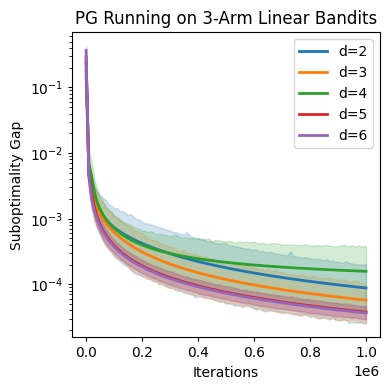

In [51]:
log_dir = "logs"
experiment_name = f"linear_pg_3_arm"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(4, 4), sharex=False, sharey=False, squeeze=False
)
ax = axes.flat[0]

df = pd.concat(
    (pd.read_csv(f, index_col=0) for env in environments for f in glob.glob(f"{path}/{env}/*.csv")),
    ignore_index=True,
)

line_plot = sns.lineplot(
    data=df, x="iteration", y="sub_opt_gap", hue="env_name", ax=ax, linewidth=2.0
)

ax.set_xlabel("Iterations")
ax.set_ylabel("Suboptimality Gap")
ax.set_yscale("log")
ax.set_title("PG Running on 3-Arm Linear Bandits")

handles, labels = ax.get_legend_handles_labels()
new_labels = [label.replace("Random ", "") for label in labels]
ax.legend(handles, new_labels)

plt.tight_layout()
plt.savefig("plots/det_3_arm.png", bbox_inches="tight", dpi=400)

## Multi-Arm Bandits

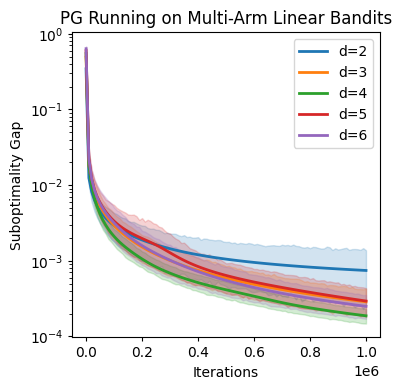

In [52]:
log_dir = "logs"
experiment_name = f"linear_pg_multi_arm"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(4, 4), sharex=False, sharey=False, squeeze=False
)
ax = axes.flat[0]

df = pd.concat(
    (pd.read_csv(f, index_col=0) for env in environments for f in glob.glob(f"{path}/{env}/*.csv")),
    ignore_index=True,
)

line_plot = sns.lineplot(
    data=df, x="iteration", y="sub_opt_gap", hue="env_name", ax=ax, linewidth=2.0
)

ax.set_xlabel("Iterations")
ax.set_ylabel("Suboptimality Gap")
ax.set_yscale("log")
ax.set_title("PG Running on Multi-Arm Linear Bandits")

handles, labels = ax.get_legend_handles_labels()
new_labels = [label.replace("Random ", "") for label in labels]
ax.legend(handles, new_labels)

plt.tight_layout()
plt.savefig("plots/det_multi_arm.png", bbox_inches="tight", dpi=400)

# Stochastic Experiments

In [54]:
environments = [
    # "Bernoulli (easy)",
    # "Gaussian (easy)",
    # "Beta (easy)",
    # "Bernoulli (hard)",
    # "Gaussian (hard)",
    # "Beta (hard)",
    "Bernoulli",
    "Gaussian",
    "Beta",
]
log_dir = "logs"
experiment_name = f"linear_spg"
path = f"{log_dir}/{experiment_name}"

## Different Stepsizes

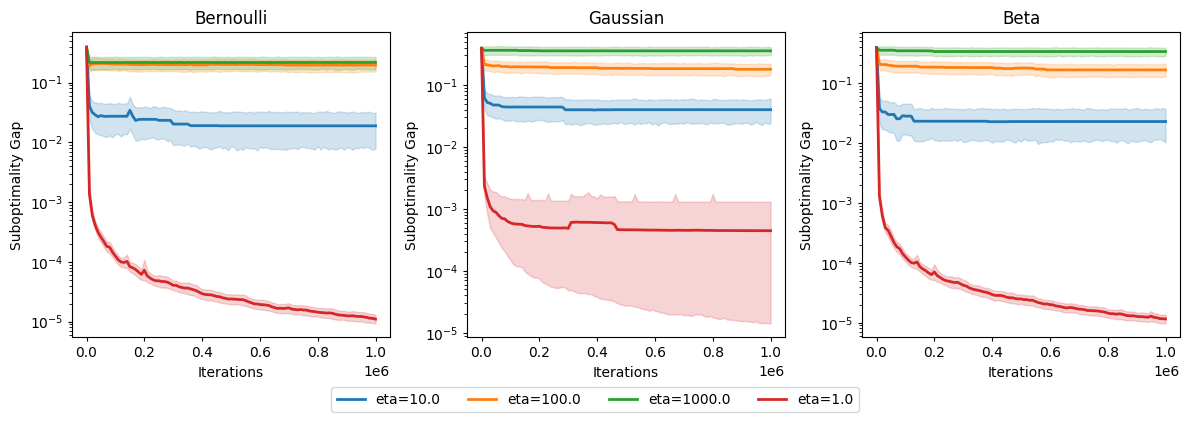

In [55]:
fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df[df["algo"].str.contains("eta=1") == True]

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()
new_labels = [label.replace("linear_spg_", "") for label in labels]
fig.legend(lines, new_labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/sto_stepsizes.png", bbox_inches="tight", dpi=400)

## Different Runs

In [56]:
environments = [
    "Bernoulli",
    "Gaussian",
    "Beta",
    "Bernoulli",
    "Gaussian",
    "Beta",
    "Bernoulli",
    "Gaussian",
    "Beta",
]

/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T/ipykernel_5878/1361681923.py:20: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  line_plot = sns.lineplot(
/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T/ipykernel_5878/1361681923.py:20: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  line_plot = sns.lineplot(
/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T/ipykernel_5878/1361681923.py:20: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  line_plot = sns.lineplot(
/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T/ipykernel_5878/1361681923.py:20: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  line_plot = sns.lineplot(
/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T

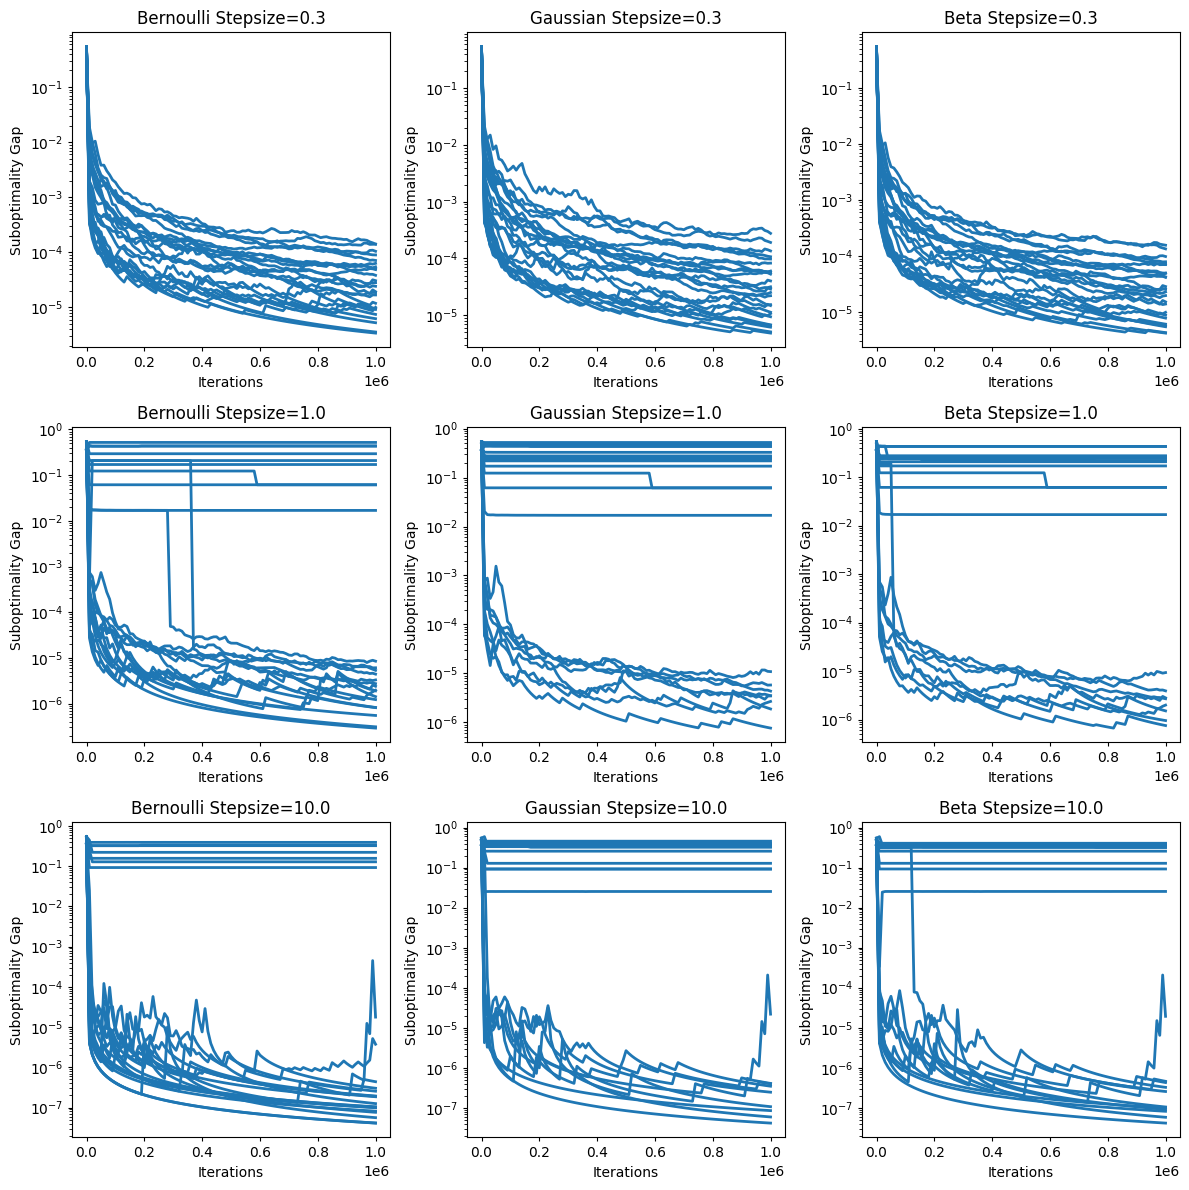

In [71]:
etas = ["0.3", "1.0", "10.0"]

fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(12, 12), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df[df["algo"].str.contains(f"eta={etas[idx//3]}") == True]
    df = df[df["instance_number"] < 5]

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="run_number", ax=ax, linewidth=2.0, palette=['C0'], errorbar=None
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env + f" Stepsize={etas[idx//3]}")

plt.tight_layout()
plt.savefig("plots/sto_instances.png", bbox_inches="tight", dpi=400)

/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T/ipykernel_5878/4155186733.py:20: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  line_plot = sns.lineplot(
/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T/ipykernel_5878/4155186733.py:20: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  line_plot = sns.lineplot(
/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T/ipykernel_5878/4155186733.py:20: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  line_plot = sns.lineplot(
/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T/ipykernel_5878/4155186733.py:20: UserWarning: 
The palette list has fewer values (1) than needed (25) and will cycle, which may produce an uninterpretable plot.
  line_plot = sns.lineplot(
/var/folders/p9/834686tx3cj9c9r2bbg02w2w0000gn/T

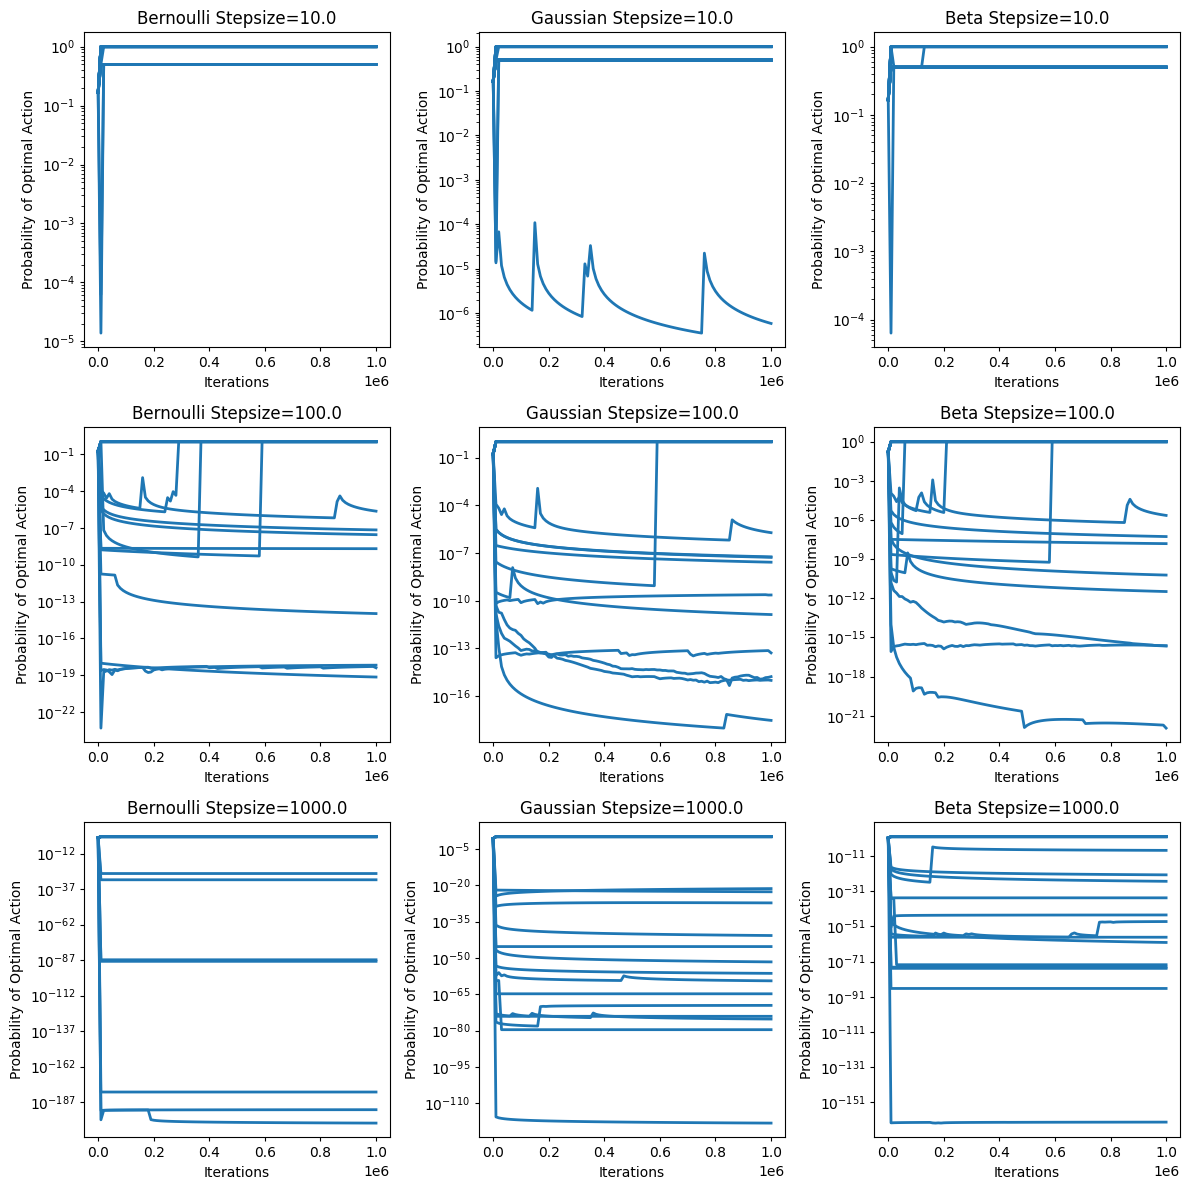

In [65]:
etas = ["10.0", "100.0", "1000.0"]

fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(12, 12), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df[df["algo"].str.contains(f"eta={etas[idx//3]}") == True]
    df = df[df["instance_number"] < 5]

    line_plot = sns.lineplot(
        data=df, x="iteration", y="opt_action_pr", hue="run_number", ax=ax, linewidth=2.0, palette=['C0'], errorbar=None
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Probability of Optimal Action")
    ax.set_yscale("log")
    ax.set_title(env + f" Stepsize={etas[idx//3]}")

plt.tight_layout()
plt.savefig("plots/sto_instances.png", bbox_inches="tight", dpi=400)